In [1]:
import numpy as np
import pandas as pd

def generate_ibm_hr_dataset(n_samples=1_000_000, seed=42):
    """
    Gera um dataset sintético inspirado no IBM HR Analytics com relações mais realistas

    Parameters:
    n_samples (int): Número de amostras a gerar
    seed (int): Seed para reprodutibilidade

    Returns:
    pd.DataFrame: Dataset gerado
    """
    np.random.seed(seed)

    # Gerando dados base
    data = {}

    # Idade com distribuição mais realista (concentrada entre 25-50 anos)
    data['Age'] = np.random.normal(38, 10, n_samples).astype(int)
    data['Age'] = np.clip(data['Age'], 18, 65)

    # Gênero
    data['Gender'] = np.random.choice(['Female', 'Male'], n_samples, p=[0.4, 0.6])

    # Educação (1-5: Below College, College, Bachelor, Master, Doctor)
    education_probs = [0.05, 0.15, 0.40, 0.30, 0.10]
    data['Education'] = np.random.choice([1, 2, 3, 4, 5], n_samples, p=education_probs)

    # Campo educacional baseado no nível de educação
    education_fields = ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
    data['EducationField'] = np.random.choice(education_fields, n_samples)

    # Departamento
    dept_probs = [0.45, 0.40, 0.15]  # Sales mais comum, HR menos comum
    data['Department'] = np.random.choice(['Sales', 'Research & Development', 'Human Resources'],
                                        n_samples, p=dept_probs)

    # Job Role baseado no departamento
    job_roles = {
        'Sales': ['Sales Executive', 'Sales Representative', 'Manager'],
        'Research & Development': ['Research Scientist', 'Laboratory Technician', 'Research Director', 'Manager'],
        'Human Resources': ['Human Resources', 'Manager']
    }

    data['JobRole'] = np.empty(n_samples, dtype=object)
    for dept in job_roles:
        mask = np.array(data['Department']) == dept
        n_dept = mask.sum()
        if n_dept > 0:
            data['JobRole'][mask] = np.random.choice(job_roles[dept], n_dept)

    # Job Level correlacionado com idade e educação
    base_level = np.ones(n_samples)
    age_bonus = (np.array(data['Age']) - 18) / 47 * 2  # 0-2 pontos baseado na idade
    edu_bonus = (np.array(data['Education']) - 1) / 4 * 2  # 0-2 pontos baseado na educação

    data['JobLevel'] = np.round(base_level + age_bonus + edu_bonus).astype(int)
    data['JobLevel'] = np.clip(data['JobLevel'], 1, 5)

    # Total Working Years correlacionado com idade
    data['TotalWorkingYears'] = np.maximum(0, data['Age'] - 18 - np.random.randint(0, 5, n_samples))

    # Years at Company (não pode ser maior que TotalWorkingYears)
    data['YearsAtCompany'] = np.random.randint(0, 21, n_samples)
    data['YearsAtCompany'] = np.minimum(data['YearsAtCompany'], data['TotalWorkingYears'])

    # Years in Current Role (não pode ser maior que YearsAtCompany)
    data['YearsInCurrentRole'] = np.random.randint(0, 11, n_samples)
    data['YearsInCurrentRole'] = np.minimum(data['YearsInCurrentRole'], data['YearsAtCompany'])

    # Years Since Last Promotion
    data['YearsSinceLastPromotion'] = np.random.randint(0, 8, n_samples)
    data['YearsSinceLastPromotion'] = np.minimum(data['YearsSinceLastPromotion'], data['YearsAtCompany'])

    # Years With Current Manager
    data['YearsWithCurrManager'] = np.random.randint(0, 8, n_samples)
    data['YearsWithCurrManager'] = np.minimum(data['YearsWithCurrManager'], data['YearsInCurrentRole'])

    # Número de empresas trabalhadas (correlacionado com anos totais de trabalho)
    max_companies = np.minimum(data['TotalWorkingYears'] // 2, 9)
    data['NumCompaniesWorked'] = np.array([np.random.randint(0, max(1, mc) + 1) for mc in max_companies])

    # Monthly Income correlacionado com JobLevel, Education e TotalWorkingYears
    base_income = 2000
    level_factor = data['JobLevel'] * 2000
    education_factor = data['Education'] * 500
    experience_factor = data['TotalWorkingYears'] * 100
    noise = np.random.normal(0, 1000, n_samples)

    data['MonthlyIncome'] = base_income + level_factor + education_factor + experience_factor + noise
    data['MonthlyIncome'] = np.clip(data['MonthlyIncome'].astype(int), 1000, 20000)

    # Rates
    data['DailyRate'] = np.random.randint(100, 1500, n_samples)
    data['HourlyRate'] = np.random.randint(30, 100, n_samples)
    data['MonthlyRate'] = np.random.randint(2000, 27000, n_samples)

    # Distance from home (distribuição exponencial - mais pessoas moram perto)
    data['DistanceFromHome'] = np.random.exponential(7, n_samples).astype(int) + 1
    data['DistanceFromHome'] = np.clip(data['DistanceFromHome'], 1, 29)

    # Business Travel
    travel_probs = [0.70, 0.20, 0.10]  # Maioria viaja raramente
    data['BusinessTravel'] = np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
                                            n_samples, p=travel_probs)

    # Satisfação e envolvimento
    data['EnvironmentSatisfaction'] = np.random.choice([1, 2, 3, 4], n_samples, p=[0.10, 0.20, 0.40, 0.30])
    data['JobSatisfaction'] = np.random.choice([1, 2, 3, 4], n_samples, p=[0.10, 0.20, 0.40, 0.30])
    data['RelationshipSatisfaction'] = np.random.choice([1, 2, 3, 4], n_samples, p=[0.10, 0.20, 0.40, 0.30])
    data['JobInvolvement'] = np.random.choice([1, 2, 3, 4], n_samples, p=[0.05, 0.15, 0.50, 0.30])
    data['WorkLifeBalance'] = np.random.choice([1, 2, 3, 4], n_samples, p=[0.10, 0.25, 0.45, 0.20])

    # Performance Rating (maioria boa performance)
    data['PerformanceRating'] = np.random.choice([3, 4], n_samples, p=[0.84, 0.16])

    # Percent Salary Hike correlacionado com Performance Rating
    data['PercentSalaryHike'] = np.where(
        data['PerformanceRating'] == 4,
        np.random.randint(15, 26, n_samples),
        np.random.randint(11, 18, n_samples)
    )

    # Stock Option Level correlacionado com JobLevel
    data['StockOptionLevel'] = np.random.choice([0, 1, 2, 3], n_samples,
                                               p=[0.40, 0.35, 0.20, 0.05])
    high_level_mask = data['JobLevel'] >= 4
    data['StockOptionLevel'][high_level_mask] = np.random.choice([1, 2, 3],
                                                                 high_level_mask.sum(),
                                                                 p=[0.30, 0.50, 0.20])

    # Training Times Last Year
    data['TrainingTimesLastYear'] = np.random.choice([0, 1, 2, 3, 4, 5, 6], n_samples,
                                                    p=[0.05, 0.10, 0.25, 0.30, 0.20, 0.08, 0.02])

    # Marital Status
    data['MaritalStatus'] = np.random.choice(['Single', 'Married', 'Divorced'], n_samples,
                                           p=[0.32, 0.55, 0.13])

    # OverTime - maior probabilidade para níveis menores e pessoas mais jovens
    overtime_base_prob = 0.28
    age_factor = (65 - data['Age']) / 47 * 0.1  # Jovens trabalham mais overtime
    level_factor = (5 - data['JobLevel']) / 4 * 0.1  # Níveis menores trabalham mais overtime

    overtime_prob = np.clip(overtime_base_prob + age_factor + level_factor, 0.1, 0.5)
    data['OverTime'] = [np.random.choice(['Yes', 'No'], p=[p, 1-p]) for p in overtime_prob]

    # Attrition - baseado em múltiplos fatores
    attrition_score = np.zeros(n_samples)

    # Fatores que aumentam attrition
    attrition_score += (data['JobSatisfaction'] == 1) * 0.15
    attrition_score += (data['EnvironmentSatisfaction'] == 1) * 0.10
    attrition_score += (data['WorkLifeBalance'] == 1) * 0.10
    attrition_score += (np.array(data['OverTime']) == 'Yes') * 0.08
    attrition_score += (data['YearsSinceLastPromotion'] > 5) * 0.05
    attrition_score += (data['DistanceFromHome'] > 20) * 0.05
    attrition_score += (np.array(data['MaritalStatus']) == 'Single') * 0.03
    attrition_score += (data['NumCompaniesWorked'] > 5) * 0.04

    # Fatores que diminuem attrition
    attrition_score -= (data['JobLevel'] >= 4) * 0.10
    attrition_score -= (data['YearsAtCompany'] > 10) * 0.08
    attrition_score -= (data['StockOptionLevel'] > 0) * 0.05

    # Probabilidade base de 16%
    attrition_prob = np.clip(0.16 + attrition_score, 0.05, 0.50)
    data['Attrition'] = [np.random.choice(['Yes', 'No'], p=[p, 1-p]) for p in attrition_prob]

    # Campos fixos
    data['EmployeeCount'] = np.ones(n_samples, dtype=int)
    data['EmployeeNumber'] = np.arange(1, n_samples + 1)
    data['Over18'] = ['Y'] * n_samples
    data['StandardHours'] = [80] * n_samples

    # Criar DataFrame
    df = pd.DataFrame(data)

    # Reordenar colunas para match com o dataset original
    column_order = [
        'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'
    ]

    return df[column_order]

# Exemplo de uso
if __name__ == "__main__":
    # Gerar dataset
    df = generate_ibm_hr_dataset(n_samples=1_000_000, seed=42)

    print("Dataset gerado com sucesso!")
    print(f"Shape: {df.shape}")
    print("\nPrimeiras 5 linhas:")
    print(df.head())

    print("\nEstatísticas de Attrition:")
    print(df['Attrition'].value_counts(normalize=True))

    print("\nDistribuição de JobLevel:")
    print(df['JobLevel'].value_counts().sort_index())

    print("\nMédia de salário por JobLevel:")
    print(df.groupby('JobLevel')['MonthlyIncome'].mean().round(2))

Dataset gerado com sucesso!
Shape: (1000000, 35)

Primeiras 5 linhas:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   42        No      Travel_Rarely        575  Research & Development   
1   36        No      Travel_Rarely        535         Human Resources   
2   44        No      Travel_Rarely        286  Research & Development   
3   53       Yes  Travel_Frequently        746                   Sales   
4   35        No      Travel_Rarely        408  Research & Development   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                 1          3         Marketing              1   
1                 2          4   Human Resources              1   
2                 2          4           Medical              1   
3                11          2           Medical              1   
4                 7          5  Technical Degree              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0               

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           f1_score, accuracy_score, precision_score, recall_score)
import lightgbm as lgb
import optuna
from optuna.samplers import TPESampler
import warnings
import time
from datetime import datetime
import joblib
import os

warnings.filterwarnings('ignore')

# Configurar matplotlib para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
class HRAttritionPipeline:
    """Pipeline completo para previsão de attrition em RH"""

    def __init__(self, use_gpu=True):
        self.use_gpu = use_gpu
        self.models = {}
        self.results = {}
        self.preprocessor = None
        self.feature_names = None

    def load_and_prepare_data(self, df):
        """Carrega e prepara os dados para modelagem"""
        print("=== Preparação dos Dados ===")
        print(f"Shape inicial: {df.shape}")

        # Remover colunas com valores únicos
        single_value_cols = ['EmployeeCount', 'Over18', 'StandardHours']
        df = df.drop(columns=single_value_cols)
        print(f"Colunas removidas (valor único): {single_value_cols}")

        # Remover EmployeeNumber (ID único)
        df = df.drop(columns=['EmployeeNumber'])

        # Separar features e target
        X = df.drop('Attrition', axis=1)
        y = df['Attrition'].map({'Yes': 1, 'No': 0})

        print(f"\nDistribuição do target:")
        print(y.value_counts(normalize=True))

        return X, y

    def create_features(self, X):
        """Cria features adicionais através de feature engineering"""
        print("\n=== Feature Engineering ===")
        X_eng = X.copy()

        # Ratios e proporções
        X_eng['IncomeToAge'] = X_eng['MonthlyIncome'] / X_eng['Age']
        X_eng['YearsPerCompany'] = X_eng['TotalWorkingYears'] / (X_eng['NumCompaniesWorked'] + 1)
        X_eng['YearsWithoutPromotion'] = X_eng['YearsSinceLastPromotion'] / (X_eng['YearsAtCompany'] + 1)
        X_eng['IncomeToEducation'] = X_eng['MonthlyIncome'] / X_eng['Education']
        X_eng['DistanceSatisfactionRatio'] = X_eng['DistanceFromHome'] / (X_eng['EnvironmentSatisfaction'] + 1)

        # Indicadores binários
        X_eng['HighDistance'] = (X_eng['DistanceFromHome'] > 20).astype(int)
        X_eng['LowSatisfaction'] = ((X_eng['JobSatisfaction'] == 1) |
                                    (X_eng['EnvironmentSatisfaction'] == 1) |
                                    (X_eng['RelationshipSatisfaction'] == 1)).astype(int)
        X_eng['NoPromotion'] = (X_eng['YearsSinceLastPromotion'] > 5).astype(int)
        X_eng['HighPerformer'] = (X_eng['PerformanceRating'] == 4).astype(int)
        X_eng['YoungHighLevel'] = ((X_eng['Age'] < 30) & (X_eng['JobLevel'] >= 3)).astype(int)

        # Scores compostos
        X_eng['SatisfactionScore'] = (X_eng['JobSatisfaction'] +
                                      X_eng['EnvironmentSatisfaction'] +
                                      X_eng['RelationshipSatisfaction']) / 3

        X_eng['WorkIntensity'] = (X_eng['OverTime'].map({'Yes': 2, 'No': 1}) *
                                  X_eng['BusinessTravel'].map({'Non-Travel': 1,
                                                              'Travel_Rarely': 2,
                                                              'Travel_Frequently': 3}))

        # Categorias de idade
        X_eng['AgeGroup'] = pd.cut(X_eng['Age'], bins=[0, 25, 35, 45, 55, 100],
                                  labels=['<25', '25-35', '35-45', '45-55', '55+'])

        # Categorias de income
        X_eng['IncomeGroup'] = pd.qcut(X_eng['MonthlyIncome'], q=5,
                                      labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])

        print(f"Features criadas: {X_eng.shape[1] - X.shape[1]}")
        print(f"Total de features: {X_eng.shape[1]}")

        return X_eng

    def create_preprocessor(self, X):
        """Cria o preprocessador para as features"""
        # Identificar colunas por tipo
        numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

        print(f"\nFeatures numéricas: {len(numeric_features)}")
        print(f"Features categóricas: {len(categorical_features)}")

        # Criar transformadores
        numeric_transformer = StandardScaler()
        categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

        # Combinar transformadores
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        return preprocessor, numeric_features, categorical_features

    def optimize_hyperparameters(self, X_train, y_train, model_name, n_trials=50):
        """Otimiza hiperparâmetros usando Optuna"""
        print(f"\n=== Otimizando {model_name} ===")

        # Converter para numpy array se necessário
        if not isinstance(X_train, np.ndarray):
            X_train = np.array(X_train)
        if not isinstance(y_train, np.ndarray):
            y_train = np.array(y_train)

        # Preparar dados para validação cruzada
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        def objective(trial):
            if model_name == 'RandomForest':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                    'max_depth': trial.suggest_int('max_depth', 3, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'random_state': 42,
                    'n_jobs': -1
                }
                model = RandomForestClassifier(**params)

            elif model_name == 'LogisticRegression':
                params = {
                    'C': trial.suggest_float('C', 0.001, 10.0, log=True),
                    'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
                    'solver': 'liblinear',  # liblinear suporta tanto l1 quanto l2
                    'max_iter': 1000,
                    'random_state': 42
                }
                model = LogisticRegression(**params)

            elif model_name == 'LightGBM':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                    'max_depth': trial.suggest_int('max_depth', 3, 20),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                    'num_leaves': trial.suggest_int('num_leaves', 10, 100),
                    'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
                    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                    'random_state': 42,
                    'n_jobs': -1,
                    'verbose': -1
                }

                if self.use_gpu:
                    params['device'] = 'gpu'
                    params['gpu_use_dp'] = False

                model = lgb.LGBMClassifier(**params)

            # Validação cruzada
            scores = []
            for train_idx, val_idx in cv.split(X_train, y_train):
                # Usar indexação numpy correta
                X_fold_train = X_train[train_idx, :]
                y_fold_train = y_train[train_idx]
                X_fold_val = X_train[val_idx, :]
                y_fold_val = y_train[val_idx]

                model.fit(X_fold_train, y_fold_train)
                y_pred = model.predict_proba(X_fold_val)[:, 1]
                score = roc_auc_score(y_fold_val, y_pred)
                scores.append(score)

            return np.mean(scores)

        # Otimizar
        study = optuna.create_study(
            direction='maximize',
            sampler=TPESampler(seed=42)
        )

        study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

        print(f"Melhor AUC-ROC: {study.best_value:.4f}")
        print(f"Melhores parâmetros: {study.best_params}")

        return study.best_params

    def train_models(self, X_train, y_train, X_test, y_test):
        """Treina todos os modelos com hiperparâmetros otimizados"""
        print("\n=== Treinamento dos Modelos ===")

        # Preprocessar dados
        self.preprocessor, self.numeric_features, self.categorical_features = self.create_preprocessor(X_train)

        X_train_processed = self.preprocessor.fit_transform(X_train)
        X_test_processed = self.preprocessor.transform(X_test)

        # Converter para numpy arrays se necessário
        if hasattr(X_train_processed, 'toarray'):
            X_train_processed = X_train_processed.toarray()
        if hasattr(X_test_processed, 'toarray'):
            X_test_processed = X_test_processed.toarray()

        # Armazenar nomes das features após one-hot encoding
        cat_encoder = self.preprocessor.named_transformers_['cat']
        cat_feature_names = []
        if hasattr(cat_encoder, 'get_feature_names_out'):
            cat_feature_names = cat_encoder.get_feature_names_out(self.categorical_features).tolist()

        self.feature_names = self.numeric_features + cat_feature_names

        # Modelos a treinar
        models_config = {
            'RandomForest': RandomForestClassifier,
            'LogisticRegression': LogisticRegression,
            'LightGBM': lgb.LGBMClassifier
        }

        for model_name, ModelClass in models_config.items():
            print(f"\n--- {model_name} ---")
            start_time = time.time()

            # Otimizar hiperparâmetros
            best_params = self.optimize_hyperparameters(
                X_train_processed, y_train, model_name, n_trials=30
            )

            # Treinar modelo final
            if model_name == 'RandomForest':
                model = RandomForestClassifier(**best_params)
            elif model_name == 'LogisticRegression':
                # Garantir que o solver está correto para o modelo final
                if 'solver' not in best_params:
                    best_params['solver'] = 'liblinear'
                model = LogisticRegression(**best_params)
            elif model_name == 'LightGBM':
                if self.use_gpu:
                    best_params['device'] = 'gpu'
                    best_params['gpu_use_dp'] = False
                model = lgb.LGBMClassifier(**best_params)

            model.fit(X_train_processed, y_train)

            # Fazer predições
            y_pred = model.predict(X_test_processed)
            y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

            # Calcular métricas
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'auc_roc': roc_auc_score(y_test, y_pred_proba),
                'training_time': time.time() - start_time
            }

            # Armazenar resultados
            self.models[model_name] = model
            self.results[model_name] = {
                'metrics': metrics,
                'predictions': y_pred,
                'probabilities': y_pred_proba,
                'best_params': best_params
            }

            print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
            print(f"Tempo de treinamento: {metrics['training_time']:.2f}s")

    def plot_results(self, X_test, y_test):
        """Gera visualizações comparativas dos modelos"""
        print("\n=== Gerando Visualizações ===")

        fig = plt.figure(figsize=(20, 15))

        # 1. Comparação de métricas
        ax1 = plt.subplot(3, 3, 1)
        metrics_df = pd.DataFrame({
            model: results['metrics']
            for model, results in self.results.items()
        }).T
        metrics_df[['accuracy', 'precision', 'recall', 'f1', 'auc_roc']].plot(
            kind='bar', ax=ax1, colormap='viridis'
        )
        ax1.set_title('Comparação de Métricas por Modelo', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Modelo')
        ax1.set_ylabel('Score')
        ax1.legend(loc='lower right')
        ax1.grid(True, alpha=0.3)

        # 2. Curvas ROC
        ax2 = plt.subplot(3, 3, 2)
        for model_name, results in self.results.items():
            fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
            auc = results['metrics']['auc_roc']
            ax2.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linewidth=2)

        ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax2.set_xlabel('Taxa de Falsos Positivos')
        ax2.set_ylabel('Taxa de Verdadeiros Positivos')
        ax2.set_title('Curvas ROC', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Curvas Precision-Recall
        ax3 = plt.subplot(3, 3, 3)
        for model_name, results in self.results.items():
            precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
            ax3.plot(recall, precision, label=model_name, linewidth=2)

        ax3.set_xlabel('Recall')
        ax3.set_ylabel('Precision')
        ax3.set_title('Curvas Precision-Recall', fontsize=14, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4-6. Matrizes de Confusão
        for idx, (model_name, results) in enumerate(self.results.items()):
            ax = plt.subplot(3, 3, 4 + idx)
            cm = confusion_matrix(y_test, results['predictions'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                       xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
            ax.set_title(f'Matriz de Confusão - {model_name}', fontsize=12)
            ax.set_xlabel('Predito')
            ax.set_ylabel('Real')

        # 7. Feature Importance (Random Forest)
        ax7 = plt.subplot(3, 3, 7)
        if 'RandomForest' in self.models:
            rf_model = self.models['RandomForest']
            importances = rf_model.feature_importances_
            indices = np.argsort(importances)[::-1][:15]

            ax7.barh(range(15), importances[indices], color='skyblue', edgecolor='navy')
            ax7.set_yticks(range(15))
            ax7.set_yticklabels([self.feature_names[i] for i in indices])
            ax7.set_xlabel('Importância')
            ax7.set_title('Top 15 Features - Random Forest', fontsize=12)
            ax7.grid(True, alpha=0.3, axis='x')

        # 8. Feature Importance (LightGBM)
        ax8 = plt.subplot(3, 3, 8)
        if 'LightGBM' in self.models:
            lgb_model = self.models['LightGBM']
            importances = lgb_model.feature_importances_
            indices = np.argsort(importances)[::-1][:15]

            ax8.barh(range(15), importances[indices], color='lightcoral', edgecolor='darkred')
            ax8.set_yticks(range(15))
            ax8.set_yticklabels([self.feature_names[i] for i in indices])
            ax8.set_xlabel('Importância')
            ax8.set_title('Top 15 Features - LightGBM', fontsize=12)
            ax8.grid(True, alpha=0.3, axis='x')

        # 9. Tempo de treinamento
        ax9 = plt.subplot(3, 3, 9)
        models = list(self.results.keys())
        times = [self.results[m]['metrics']['training_time'] for m in models]
        bars = ax9.bar(models, times, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
        ax9.set_xlabel('Modelo')
        ax9.set_ylabel('Tempo (segundos)')
        ax9.set_title('Tempo de Treinamento', fontsize=12)
        ax9.grid(True, alpha=0.3, axis='y')

        # Adicionar valores nas barras
        for bar, time in zip(bars, times):
            height = bar.get_height()
            ax9.text(bar.get_x() + bar.get_width()/2., height,
                    f'{time:.1f}s', ha='center', va='bottom')

        plt.tight_layout()
        plt.savefig('model_comparison_results.png', dpi=300, bbox_inches='tight')
        plt.show()

    def generate_report(self):
        """Gera relatório detalhado dos resultados"""
        print("\n" + "="*80)
        print("RELATÓRIO FINAL - COMPARAÇÃO DE MODELOS")
        print("="*80)
        print(f"Data: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("\n")

        # Tabela de métricas
        metrics_data = []
        for model_name, results in self.results.items():
            metrics = results['metrics']
            metrics_data.append({
                'Modelo': model_name,
                'Acurácia': f"{metrics['accuracy']:.4f}",
                'Precisão': f"{metrics['precision']:.4f}",
                'Recall': f"{metrics['recall']:.4f}",
                'F1-Score': f"{metrics['f1']:.4f}",
                'AUC-ROC': f"{metrics['auc_roc']:.4f}",
                'Tempo (s)': f"{metrics['training_time']:.2f}"
            })

        metrics_df = pd.DataFrame(metrics_data)
        print("MÉTRICAS DE DESEMPENHO:")
        print(metrics_df.to_string(index=False))

        # Melhor modelo
        best_model = max(self.results.items(), key=lambda x: x[1]['metrics']['auc_roc'])
        print(f"\n✨ MELHOR MODELO: {best_model[0]} (AUC-ROC: {best_model[1]['metrics']['auc_roc']:.4f})")

        # Hiperparâmetros
        print("\n" + "-"*80)
        print("HIPERPARÂMETROS OTIMIZADOS:")
        print("-"*80)
        for model_name, results in self.results.items():
            print(f"\n{model_name}:")
            for param, value in results['best_params'].items():
                print(f"  - {param}: {value}")

        # Insights
        print("\n" + "-"*80)
        print("INSIGHTS E RECOMENDAÇÕES:")
        print("-"*80)

        # Análise por modelo
        for model_name, results in self.results.items():
            metrics = results['metrics']
            print(f"\n{model_name}:")

            if metrics['precision'] > metrics['recall']:
                print("  ✓ Alta precisão: Poucos falsos positivos")
                print("  ⚠ Recall menor: Pode perder alguns casos de attrition")
            else:
                print("  ✓ Alto recall: Captura bem os casos de attrition")
                print("  ⚠ Precisão menor: Mais falsos alarmes")

            if metrics['auc_roc'] > 0.85:
                print("  ✓ Excelente capacidade de discriminação (AUC > 0.85)")
            elif metrics['auc_roc'] > 0.75:
                print("  ✓ Boa capacidade de discriminação (AUC > 0.75)")
            else:
                print("  ⚠ Capacidade de discriminação pode ser melhorada")

        print("\n" + "="*80)

    def save_models(self, path='models/'):
        """Salva os modelos treinados"""
        if not os.path.exists(path):
            os.makedirs(path)

        # Salvar preprocessador
        joblib.dump(self.preprocessor, f'{path}preprocessor.pkl')

        # Salvar modelos
        for model_name, model in self.models.items():
            filename = f'{path}{model_name.lower()}_model.pkl'
            joblib.dump(model, filename)
            print(f"Modelo {model_name} salvo em: {filename}")

        # Salvar metadados
        metadata = {
            'feature_names': self.feature_names,
            'numeric_features': self.numeric_features,
            'categorical_features': self.categorical_features,
            'results': {k: v['metrics'] for k, v in self.results.items()},
            'training_date': datetime.now().isoformat()
        }

        import json
        with open(f'{path}metadata.json', 'w') as f:
            json.dump(metadata, f, indent=2)

        print(f"\nTodos os modelos salvos em: {path}")

In [5]:
# 2. Criar pipeline
pipeline = HRAttritionPipeline(use_gpu=True)

# 3. Preparar e treinar
X, y = pipeline.load_and_prepare_data(df)
X_eng = pipeline.create_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_eng, y, test_size=0.2)
pipeline.train_models(X_train, y_train, X_test, y_test)

=== Preparação dos Dados ===
Shape inicial: (1000000, 35)
Colunas removidas (valor único): ['EmployeeCount', 'Over18', 'StandardHours']

Distribuição do target:
Attrition
0    0.821159
1    0.178841
Name: proportion, dtype: float64

=== Feature Engineering ===
Features criadas: 14
Total de features: 44

=== Treinamento dos Modelos ===

Features numéricas: 35
Features categóricas: 9


[I 2025-06-13 09:40:47,542] A new study created in memory with name: no-name-d6f5962f-6076-4839-b261-361e9cd6d6d8



--- RandomForest ---

=== Otimizando RandomForest ===


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-06-13 09:42:28,247] Trial 0 finished with value: 0.6708148869285754 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6708148869285754.
[I 2025-06-13 09:44:54,476] Trial 1 finished with value: 0.6738890097578304 and parameters: {'n_estimators': 267, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6738890097578304.
[I 2025-06-13 09:48:22,842] Trial 2 finished with value: 0.6643710247716528 and parameters: {'n_estimators': 95, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 1 with value: 0.6738890097578304.
[I 2025-06-13 09:48:57,610] Trial 3 finished with value: 0.6706983010185484 and parameters: {'n_estimators': 85, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6738890097578304.


[I 2025-06-13 11:10:33,264] A new study created in memory with name: no-name-2dc0415f-9fa7-48f4-b6d6-43ce61894a19


AUC-ROC: 0.6796
Tempo de treinamento: 5385.72s

--- LogisticRegression ---

=== Otimizando LogisticRegression ===


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-06-13 11:13:21,749] Trial 0 finished with value: 0.659071074860465 and parameters: {'C': 0.03148911647956861, 'penalty': 'l1'}. Best is trial 0 with value: 0.659071074860465.
[I 2025-06-13 11:17:19,786] Trial 1 finished with value: 0.6590654507398683 and parameters: {'C': 0.24810409748678125, 'penalty': 'l1'}. Best is trial 0 with value: 0.659071074860465.
[I 2025-06-13 11:17:56,711] Trial 2 finished with value: 0.6582932322455672 and parameters: {'C': 0.0017073967431528124, 'penalty': 'l1'}. Best is trial 0 with value: 0.659071074860465.
[I 2025-06-13 11:18:40,556] Trial 3 finished with value: 0.6590609624122701 and parameters: {'C': 0.679657809075816, 'penalty': 'l2'}. Best is trial 0 with value: 0.659071074860465.
[I 2025-06-13 11:23:01,987] Trial 4 finished with value: 0.6590610747570702 and parameters: {'C': 2.1368329072358767, 'penalty': 'l1'}. Best is trial 0 with value: 0.659071074860465.
[I 2025-06-13 11:23:41,960] Trial 5 finished with value: 0.6587446683631177 and pa

[I 2025-06-13 12:30:50,371] A new study created in memory with name: no-name-3c742b5e-27f8-4b47-a731-36c6b1850ca5


AUC-ROC: 0.6630
Tempo de treinamento: 4817.11s

--- LightGBM ---

=== Otimizando LightGBM ===


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-06-13 12:31:06,602] Trial 0 finished with value: 0.6749160787536445 and parameters: {'n_estimators': 144, 'max_depth': 20, 'learning_rate': 0.1205712628744377, 'num_leaves': 64, 'min_child_samples': 12, 'subsample': 0.5779972601681014, 'colsample_bytree': 0.5290418060840998}. Best is trial 0 with value: 0.6749160787536445.
[I 2025-06-13 12:31:17,408] Trial 1 finished with value: 0.6771193820484198 and parameters: {'n_estimators': 267, 'max_depth': 13, 'learning_rate': 0.11114989443094977, 'num_leaves': 11, 'min_child_samples': 49, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381}. Best is trial 1 with value: 0.6771193820484198.
[I 2025-06-13 12:31:25,590] Trial 2 finished with value: 0.6765553751598912 and parameters: {'n_estimators': 95, 'max_depth': 6, 'learning_rate': 0.028145092716060652, 'num_leaves': 57, 'min_child_samples': 24, 'subsample': 0.645614570099021, 'colsample_bytree': 0.8059264473611898}. Best is trial 1 with value: 0.6771193820484198.
[


=== Gerando Visualizações ===


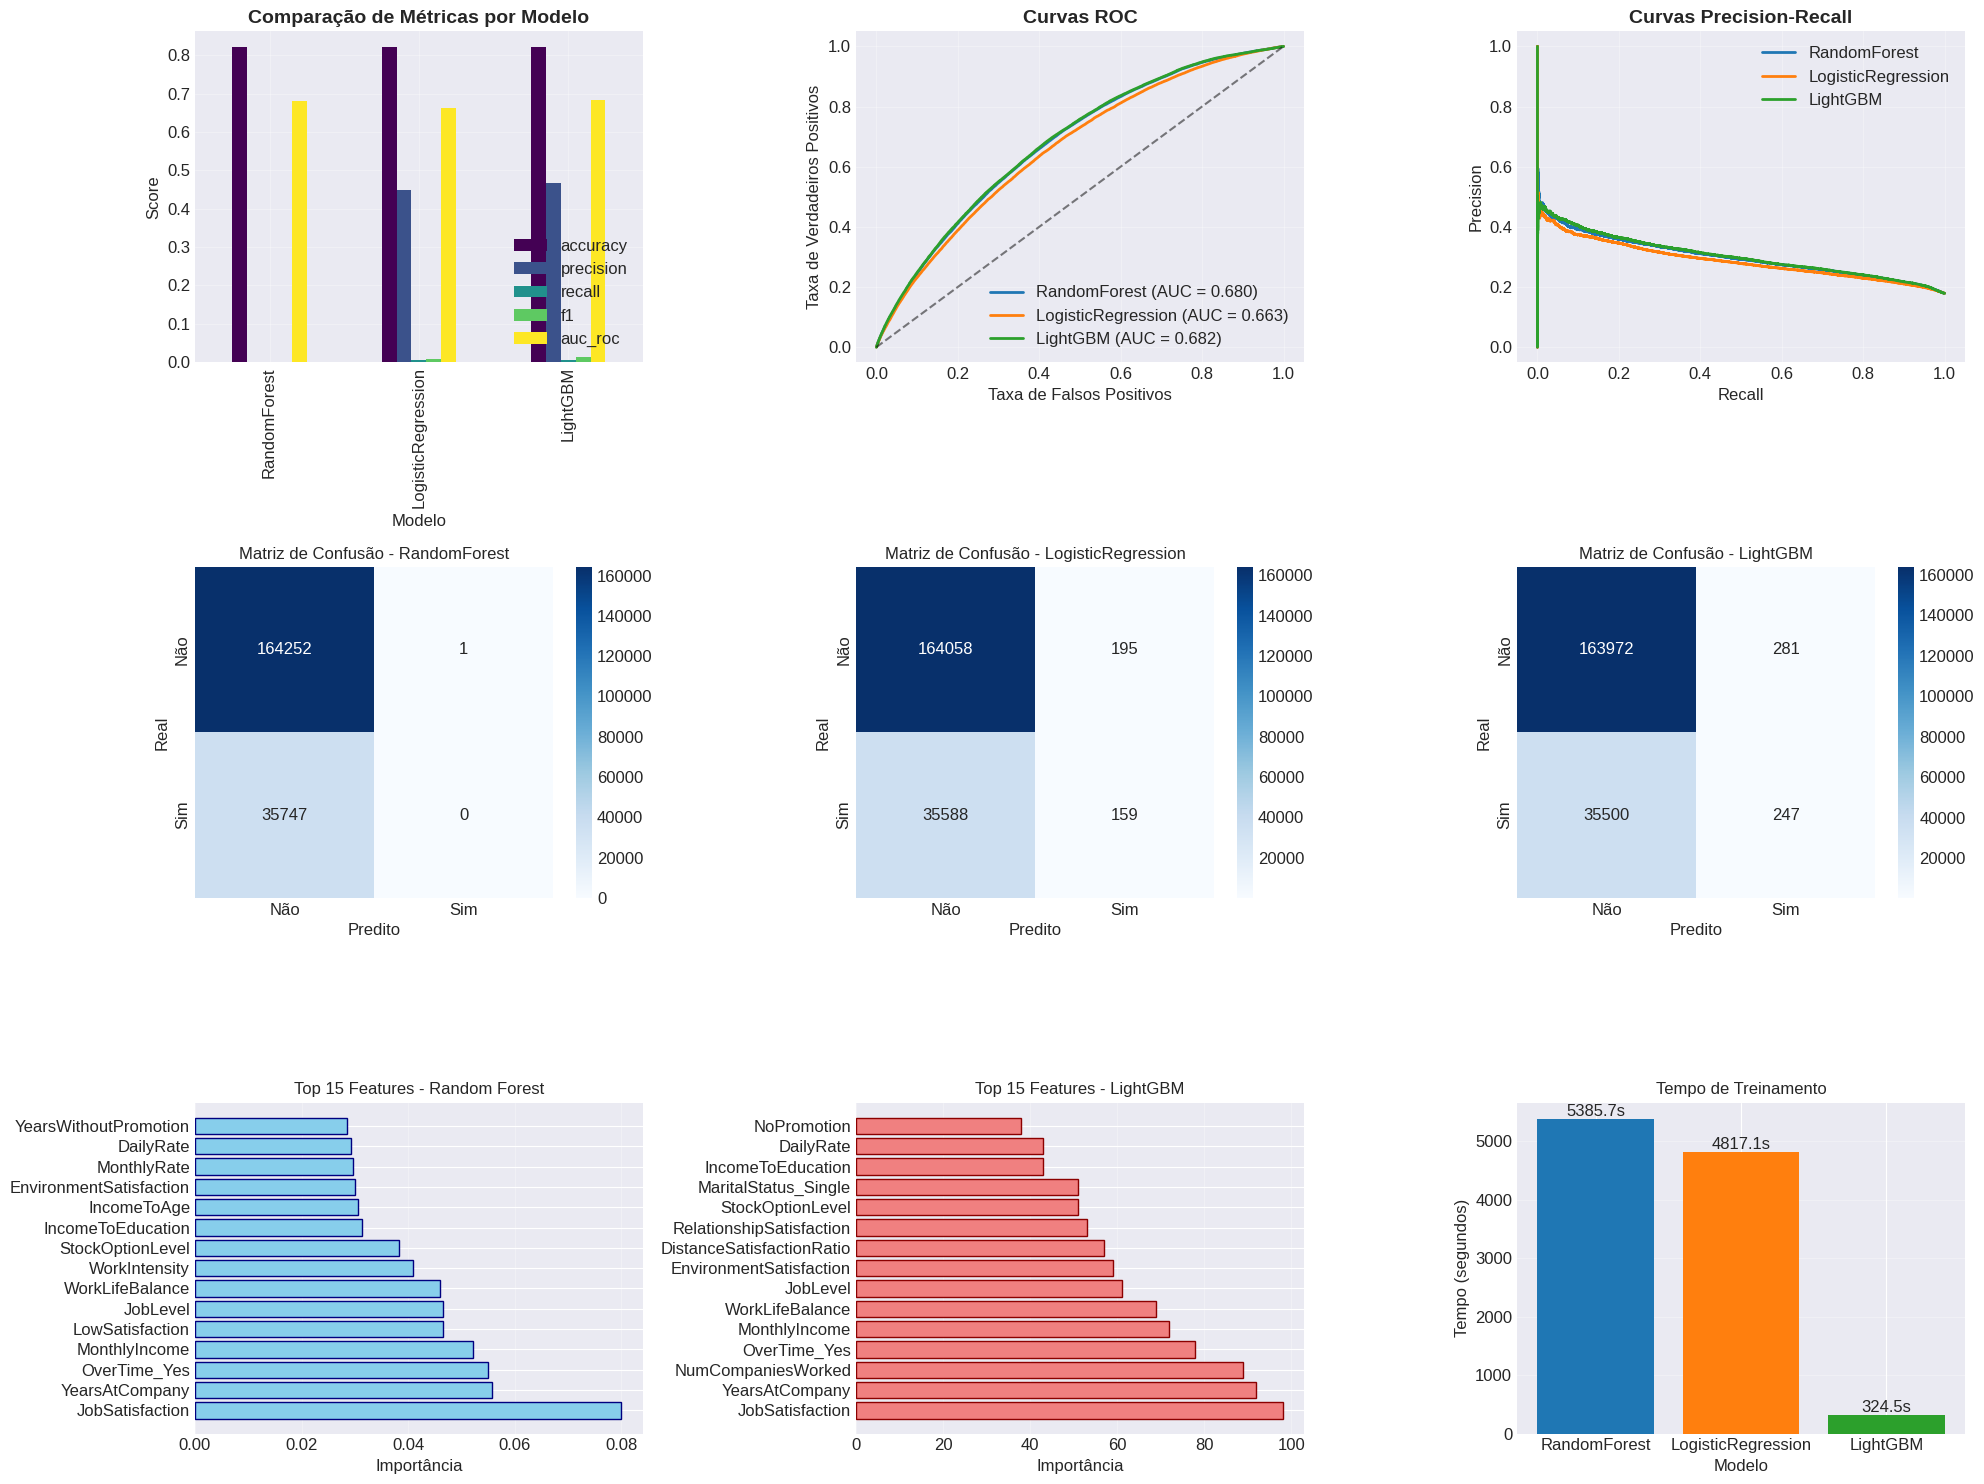


RELATÓRIO FINAL - COMPARAÇÃO DE MODELOS
Data: 2025-06-13 12:44:10


MÉTRICAS DE DESEMPENHO:
            Modelo Acurácia Precisão Recall F1-Score AUC-ROC Tempo (s)
      RandomForest   0.8213   0.0000 0.0000   0.0000  0.6796   5385.72
LogisticRegression   0.8211   0.4492 0.0044   0.0088  0.6630   4817.11
          LightGBM   0.8211   0.4678 0.0069   0.0136  0.6821    324.54

✨ MELHOR MODELO: LightGBM (AUC-ROC: 0.6821)

--------------------------------------------------------------------------------
HIPERPARÂMETROS OTIMIZADOS:
--------------------------------------------------------------------------------

RandomForest:
  - n_estimators: 240
  - max_depth: 14
  - min_samples_split: 18
  - min_samples_leaf: 10
  - max_features: sqrt

LogisticRegression:
  - C: 0.03257724300432465
  - penalty: l1
  - solver: liblinear

LightGBM:
  - n_estimators: 198
  - max_depth: 3
  - learning_rate: 0.07896186801026692
  - num_leaves: 25
  - min_child_samples: 7
  - subsample: 0.9744427686266666
  - c

In [6]:
# 4. Visualizar resultados
pipeline.plot_results(X_test, y_test)
pipeline.generate_report()